
# Project 4: Data Wrangling


# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
from bs4 import BeautifulSoup
import datetime
import os
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy

# Gathering Data

1. **Twitter Archive Enhanced** download this file manually by clicking the following link: [twitter_archived_enhanced](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. **The tweet image predictions** i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. **Twitter API & JSON** 

## 1.  twitter_archive_enhanced 

In [2]:
twitter_arch_enh = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_arch_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2. Tweet Image Prediction

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resp = requests.get(url)

with open('image_predictions.tsv', mode = "wb") as file:
    file.write(resp.content)
    
#Read TSV file
image_pred = pd.read_csv("image_predictions.tsv", sep = '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Twitter API & JSON

In [6]:
# API authentcation
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
# Checking tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in twitter_arch_enh['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(each_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)

Rate limit reached. Sleeping for: 661
Rate limit reached. Sleeping for: 661


In [9]:
print("The list of tweets", len(list_of_tweets))
print("The list of not founded tweets", len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of not founded tweets 25


In [10]:
# Then in this code block we isolate the json part of each tweepy status
# object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [11]:
# Then writing this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35924,7629,8797799,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30997,5643,8797799,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23318,3740,8797799,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39207,7799,8797799,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37455,8395,8797799,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


# Assesing Data

## eight (8) quality issues

In [15]:
twitter_arch_enh.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None
1833,676146341966438401,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None
1617,685169283572338688,NaN,NaN,2016-01-07 18:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerbald. He just found out he's adopted. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685169283...,11,10,Gerbald,None,None,pupper,None


In [16]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
680,683773439333797890,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,1,miniature_pinscher,0.072885,True,Labrador_retriever,0.057866,True,schipperke,0.053257,True
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
1543,791406955684368384,https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg,4,Pembroke,0.972629,True,Cardigan,0.027026,True,basenji,0.000153,True
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True


In [17]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
189,854482394044301312,28326,6570,8797799,17,Twitter for iPhone,Original tweet,https://t.co/AL4Ahm1Rm5
1414,696900204696625153,3133,1006,8797810,17,Twitter for iPhone,Original tweet,https://t.co/NKuON5Al8i
211,850019790995546112,19951,4732,8797799,17,Twitter for iPhone,Original tweet,https://t.co/ecb3LvExde
885,757729163776290825,0,7899,8797809,17,Twitter for iPhone,This is a retweet,This is a retweet
851,761334018830917632,5192,1449,8797800,17,Twitter for iPhone,Original tweet,https://t.co/ErPLjjJOKc
1376,699446877801091073,5877,2583,8797809,17,Twitter for iPhone,Original tweet,https://t.co/9fojElzIxx
1707,679828447187857408,35717,13752,8797810,17,Twitter for iPhone,Original tweet,https://t.co/hyAC5Hq9GC
478,813187593374461952,20076,4407,8797800,17,Twitter for iPhone,Original tweet,https://t.co/rvSANEsQZJ
20,887705289381826560,28169,4879,8797799,17,Twitter for iPhone,Original tweet,https://t.co/m7BR4JgDrZ
1675,680970795137544192,2393,646,8797810,17,Twitter for iPhone,Original tweet,https://t.co/CXSJZ4Stk3


##  Programmatic Assessment  

In [19]:
# Checking for duplicates
sum(twitter_arch_enh["tweet_id"].duplicated())

0

In [70]:
twitter_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [79]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [74]:
twitter_arch_enh["retweeted_status_user_id"].unique()

array([           nan, 4.19698384e+09, 1.96074000e+07, 5.12804507e+08,
       1.54767397e+08, 7.87461778e+17, 3.63890752e+08, 5.87097230e+07,
       6.66990130e+07, 7.47554344e+17, 3.41021133e+08, 5.97064155e+08,
       4.11984180e+07, 8.11740824e+08, 7.26634734e+08, 7.12457247e+17,
       4.46675020e+07, 4.87197737e+08, 2.48855660e+07, 7.99237010e+07,
       1.22832566e+09, 1.73272909e+09, 1.95036846e+08, 2.80479778e+08,
       7.83214000e+05, 4.29683174e+09])

`retweeted_status_user_id` which has values should be dropped because we are only looking for oringial tweets

In [77]:
twitter_arch_enh["rating_denominator"].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

Some `rating_denominator` values are larger than 10

In [78]:
tweet_json["retweeted_status"].unique()

array(['Original tweet', 'This is a retweet'], dtype=object)

There are some retweets in the dataset

Checking dogs names

In [22]:
list(twitter_arch_enh.name.unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

Dogs names have some wrong values and what I found that they all start with a lowercase letter and some dogs have None values.

### Quality issues

<b>1. Twitter Archive Dataset</b>
***
1. Keeping original ratings only (no retweets) that have images


2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are not necessary for the analysis, so they should be dropped. 


3. The type of the timestamp should be datatime not object


4. The rating_denominator column has some invalid values


5. Some dogs have wrong names like: a, an, they ..., others have None values


6. tweeted_id should be converted to string


7. rating_numerator and rating_denominator should be converted to float.

***

<b>2. Tweet Image Prediction</b>

***

1. tweet_id should be converted to a string

<b>3. Twitter API & JSON</b>

1. Dropping retweets and keeping original tweets only.
 






### Tidiness
***
1. Melting dog stages into one column
2. Merging the 3 datasets
3. Creating a column for the image prediction and a column for the confidence level

### Cleaning Data 


In [23]:
# Copying the dataframe into other, just in case something happened.
twitter_arch_enh_clean = twitter_arch_enh.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

<b>Define:</b>
* 1. Keeping original tweets only and dropping retweets from `twitter_arch_enh_clean` dataset.

<b>Code:</b>

In [24]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
# Dropping retweet values
twitter_arch_enh_clean = twitter_arch_enh_clean[pd.isnull(twitter_arch_enh_clean.retweeted_status_user_id)]

<b>Test:</b>

In [26]:
twitter_arch_enh_clean.retweeted_status_user_id.count()

0

In [27]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<b>Define:</b>
* 2. Dropping in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from the `twitter_arch_enh_clean` dataset.

<b>Code:</b>

In [28]:
twitter_arch_enh_clean = twitter_arch_enh_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                     'retweeted_status_timestamp'], axis = 1)

<b>Test:</b>

In [29]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


<b>Unnecessary columms were dropped.

<b>Define:</b>
* 3. Converting the data type of the `timestamp` to datetime for the `twitter_arch_enh_clean` dataset.


<b>Code:</b>

In [30]:
twitter_arch_enh_clean["timestamp"] = pd.to_datetime(twitter_arch_enh_clean["timestamp"])

<b>Test:</b>

In [31]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<b>Define:</b>
* 4. Dropping `rating_denominator` values which are less than 10 because are invalid

<b>Code:</b>

In [32]:
twitter_arch_enh_clean.drop((twitter_arch_enh_clean[twitter_arch_enh_clean["rating_denominator"] < 10]).index, inplace = True)

<b>Test:</b>

In [33]:
twitter_arch_enh_clean[twitter_arch_enh_clean["rating_denominator"] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   int64              
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<b>Define:</b>
* 5. Fixing wrong dog `name`s and removing the null values

<b>Code:</b>

In [35]:
# Checking the unique values of dogs
list(twitter_arch_enh_clean["name"].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jer

While scrolling, I noticed that all wrong names has a feature in common which is, they all startwith a lowercase letter.

In [36]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()])

103

In [37]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name == "None"])

679

Since, we want to convert 103 values to `None` and we already have 679 values that have `None` values. Therefore, our goal is to have in the end 782 `None` values

In [38]:
# Replacing wrong values with None
wrong_values = list(twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()].name)
twitter_arch_enh_clean.name.replace(to_replace = wrong_values, value = "None", inplace = True)

<b>Test:</b>

In [39]:
twitter_arch_enh_clean[twitter_arch_enh_clean.name.str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
len(twitter_arch_enh_clean[twitter_arch_enh_clean.name == "None"])

782

<b>Define:</b>
* 6. Coverting tweeted_id to a string 


<b>Code:</b>

In [41]:
twitter_arch_enh_clean['tweet_id'] = twitter_arch_enh_clean['tweet_id'].astype(str)

<b>Test:</b>

In [42]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

<b>Define</b>
* 7. Convrting the rating_numerator and rating_denominator data type to a float

<b>Code:</b>

In [43]:
twitter_arch_enh_clean["rating_numerator"] = twitter_arch_enh_clean["rating_numerator"].astype(float)
twitter_arch_enh_clean["rating_denominator"] = twitter_arch_enh_clean["rating_denominator"].astype(float)

<b>Test:</b>

In [44]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   float64            
 6   rating_denominator  2172 non-null   float64            
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

<b>Define:</b>
* 8. `tweet_id` should be converted to a string in the `image_pred_clean` dataset

<b>Code:</b>

In [45]:
image_pred_clean["tweet_id"] = image_pred_clean["tweet_id"].astype(str)

<b>Test:</b>

In [46]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<b>Define:</b>
* 9. Creating a column for the image prediction and a column for the confidence level



In [47]:
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_pred_clean):
    if image_pred_clean['p1_dog'] == True:
        dog_type.append(image_pred_clean['p1'])
        confidence_list.append(image_pred_clean['p1_conf'])
    elif image_pred_clean['p2_dog'] == True:
        dog_type.append(image_pred_clean['p2'])
        confidence_list.append(image_pred_clean['p2_conf'])
    elif image_pred_clean['p3_dog'] == True:
        dog_type.append(image_pred_clean['p3'])
        confidence_list.append(image_pred_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_pred_clean.apply(image, axis=1)

#create new columns
image_pred_clean['dog_type'] = dog_type
image_pred_clean['confidence_list'] = confidence_list

In [48]:
image_pred_clean = image_pred_clean[image_pred_clean['dog_type'] != 'Error']

In [49]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


<b>Define:</b>
* 10. Dropping retweets and keeping original tweets only from the `tweet_json` dataset.

<b>Code:</b>

In [50]:
# Checking the number of retweets in the dataset
tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']["retweeted_status"].count()

163

In [51]:
tweet_json_clean.drop((tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']).index, inplace = True)

<b>Test:</b>

In [52]:
tweet_json_clean[tweet_json_clean["retweeted_status"] == 'This is a retweet']["retweeted_status"].count()

0

In [53]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   object
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(4), object(4)
memory usage: 152.4+ KB


<b>Define:</b>
* 11. Merging the 3 datasets to one dataset.

<b>Code:</b>

In [54]:
twitter_arch_enh_clean = pd.merge(left = twitter_arch_enh_clean, right = image_pred_clean, left_on='tweet_id',
                                  right_on='tweet_id', how='inner')

In [55]:
twitter_arch_enh_clean = pd.merge(twitter_arch_enh_clean, tweet_json_clean, on='tweet_id', how='inner')

<b>Test:</b>

In [56]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1677 non-null   object             
 1   timestamp           1677 non-null   datetime64[ns, UTC]
 2   source_x            1677 non-null   object             
 3   text                1677 non-null   object             
 4   expanded_urls       1677 non-null   object             
 5   rating_numerator    1677 non-null   float64            
 6   rating_denominator  1677 non-null   float64            
 7   name                1677 non-null   object             
 8   doggo               1677 non-null   object             
 9   floofer             1677 non-null   object             
 10  pupper              1677 non-null   object             
 11  puppo               1677 non-null   object             
 12  jpg_url             1677 non-null 

<b>Define:</b>
* 12. Melt dog stages into one column

<b>Code:</b>

In [57]:
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [i for i in twitter_arch_enh_clean.columns.tolist() if i not in MELTS_COLUMNS]

# Melt the columns
twitter_arch_enh_clean = pd.melt(twitter_arch_enh_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')


In [58]:
twitter_arch_enh_clean.drop('stages', axis = 1, inplace = True)

<b>Test:</b>

In [59]:
twitter_arch_enh_clean.dog_stage.value_counts()

None       6439
pupper      176
doggo        63
puppo        22
floofer       8
Name: dog_stage, dtype: int64

In [60]:
twitter_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            6708 non-null   object             
 1   timestamp           6708 non-null   datetime64[ns, UTC]
 2   source_x            6708 non-null   object             
 3   text                6708 non-null   object             
 4   expanded_urls       6708 non-null   object             
 5   rating_numerator    6708 non-null   float64            
 6   rating_denominator  6708 non-null   float64            
 7   name                6708 non-null   object             
 8   jpg_url             6708 non-null   object             
 9   img_num             6708 non-null   int64              
 10  p1                  6708 non-null   object             
 11  p1_conf             6708 non-null   float64            
 12  p1_dog              6708 non-null 

### Storing Data

In [67]:
twitter_arch_enh_clean.to_csv("twitter_archive_master.csv", index = False)

### Data Visualization:

In [61]:
top_dogs = twitter_arch_enh_clean["dog_type"].value_counts().iloc[:10].to_frame().reset_index().rename(columns = {"index":"dog_type", "dog_type":"value_counts"})
top_dogs

,dog_type,value_counts
0,golden_retriever,628
1,Labrador_retriever,424
2,Pembroke,380
3,Chihuahua,364
4,pug,248
5,toy_poodle,200
6,chow,192
7,Pomeranian,168
8,Samoyed,164
9,malamute,132


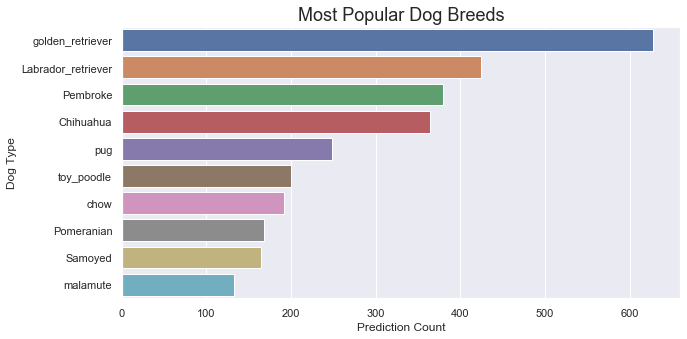

In [68]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x="value_counts", y="dog_type", data=top_dogs)

ax.set_title("Most Popular Dog Breeds",fontsize = 18);
ax.set_ylabel('Dog Type')    
ax.set_xlabel('Prediction Count');

golden_retriever has the highest prediction count 

In [63]:
dog_stage_df = twitter_arch_enh_clean.drop(twitter_arch_enh_clean.query('(dog_stage == "None")').index)
dog_stage_df

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url,dog_stage
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Pembroke,0.511319,29663,6629,8797799,17,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0,doggo
34,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,...,German_shepherd,0.707046,18992,2708,8797799,17,Twitter for iPhone,Original tweet,https://t.co/KcQj5mNR4m,doggo
75,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10.0,None,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,...,Labrador_retriever,0.476913,25507,4939,8797799,17,Twitter for iPhone,Original tweet,https://t.co/8rpIJr9sAC,doggo
82,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10.0,Napolean,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,...,komondor,0.974781,18939,3184,8797799,17,Twitter for iPhone,Original tweet,https://t.co/1HZLp9TE6u,doggo
89,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10.0,Scout,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,...,Chihuahua,0.955156,15037,2876,8797799,17,Twitter for iPhone,Original tweet,https://t.co/8UTtgmsPdl,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,752519690950500352,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.0,10.0,None,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,...,Labrador_retriever,1.00288e-05,7342,3424,8797809,17,Twitter for iPhone,Original tweet,https://t.co/G54yClasz2,puppo
5658,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.0,10.0,Cooper,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,...,Labrador_retriever,0.92939,5049,1292,8797809,17,Twitter for iPhone,Original tweet,https://t.co/yToDwVXEpA,puppo
5711,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.0,10.0,Abby,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,...,Old_English_sheepdog,0.427481,2948,608,8797808,17,Twitter for iPhone,Original tweet,https://t.co/2FPb45NXrK,puppo
5720,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.0,10.0,Kilo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,...,malamute,0.442612,4190,1210,8797808,17,Twitter for iPhone,Original tweet,https://t.co/gSmp31Zrsx,puppo


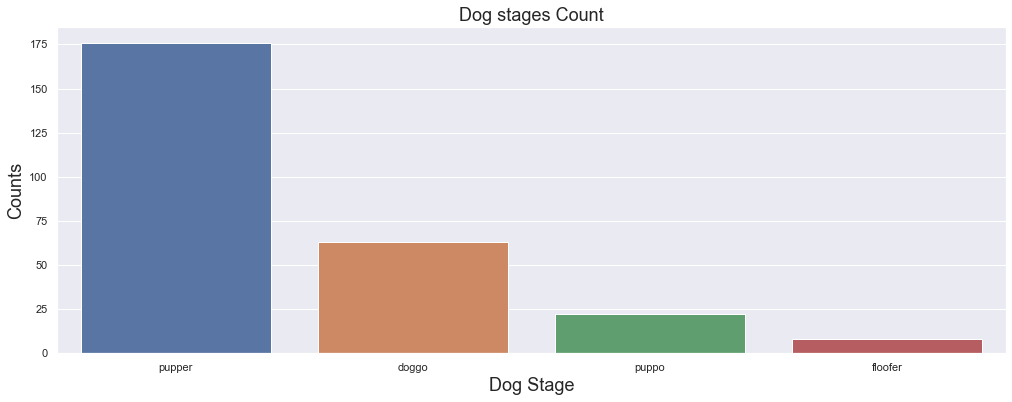

In [69]:
plt.figure(figsize = (17,6))
sns.countplot(dog_stage_df['dog_stage'],order = dog_stage_df['dog_stage'].value_counts().index);
plt.xlabel('Dog Stage', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Dog stages Count", fontsize = 18);

Pupper is the most common dog stage in the dda

### Favourite count and retweet count by Year

In [65]:
ret_fav_year = twitter_arch_enh_clean.groupby(twitter_arch_enh_clean["timestamp"].dt.year).count()[["favorite_count", "retweet_count"]].reset_index()

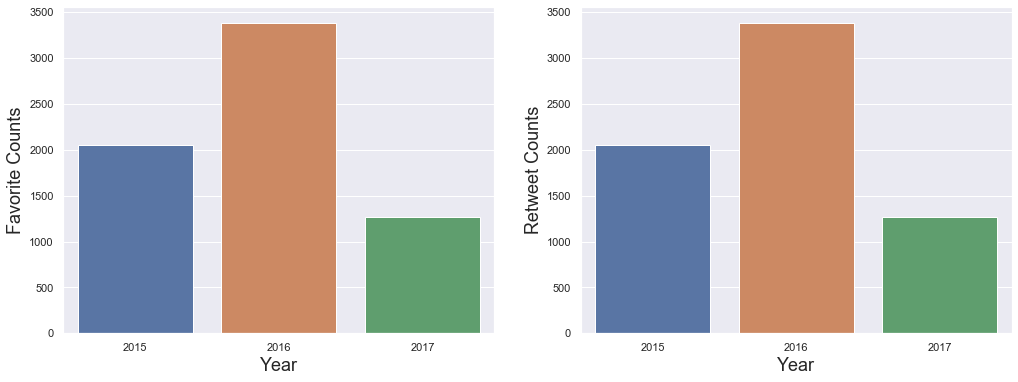

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,6))
sns.barplot(x = ret_fav_year['timestamp'],y = ret_fav_year['favorite_count'],ax = ax1);
sns.barplot(x = ret_fav_year['timestamp'], y = ret_fav_year['retweet_count'],ax = ax2);
ax1.set_xlabel('Year',fontsize = 18);
ax1.set_ylabel('Favorite Counts',fontsize = 18)
ax2.set_xlabel('Year',fontsize = 18);
ax2.set_ylabel('Retweet Counts',fontsize = 18);

2016 had the most retweet counts and favourite counts